# Title: House Prices Prediction

### Team: Pranav Kumar Jain R (E0119005)

### Objective: Predict Prices of house using ensemble methods and ANN and to gain good accuracy

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Concatinating two Dataframes
df = pd.concat((train, test))
df.shape

(2919, 81)

In [6]:
# Setting the no. of columns and rows to show 
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 2000)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [10]:
# Selecting Numerical variables
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
# Selecting Categorical variables
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
# Setting id's as index
df = df.set_index("Id")

In [13]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### Drop Columns

<AxesSubplot:ylabel='Id'>

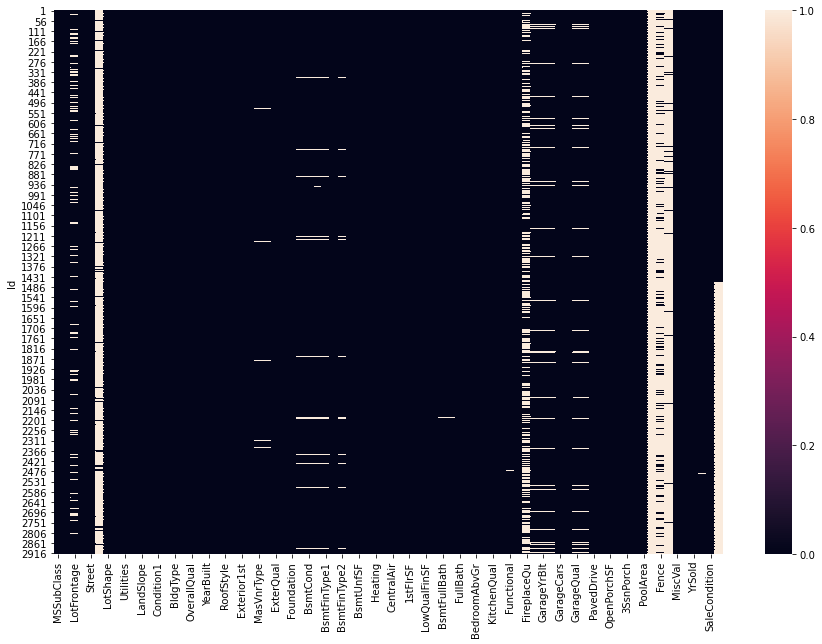

In [14]:
# See null values using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [15]:
# Percentage of null values
null_percent = (df.isnull().sum() / df.shape[0]) * 100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [16]:
# drop columns with null percent > 20%
col_drop = null_percent[null_percent > 20].keys()
df = df.drop(col_drop, 'columns')
df.shape

(2919, 74)

### Data Exploration

In [17]:
# Describe the target variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

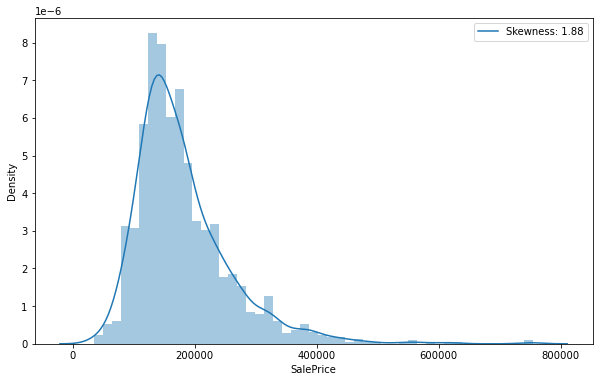

In [18]:
# displot of target
plt.figure(figsize=(10,6))
bar = sns.distplot(train['SalePrice'])
bar.legend(["Skewness: {:.2f}".format(train['SalePrice'].skew())])

In [19]:
# Highly Correlated features with target
corr_features = train.corr()
high_corr = corr_features.index[abs(corr_features['SalePrice']) >= 0.5]
high_corr

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

<AxesSubplot:>

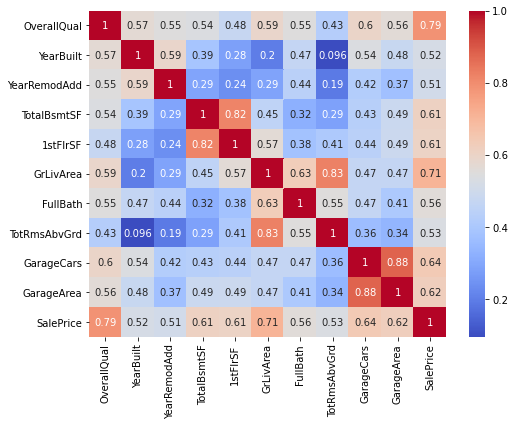

In [20]:
# Heatmap of highly correlated features
plt.figure(figsize=(8,6))
sns.heatmap(train[high_corr].corr(), cmap='coolwarm', annot=True)

### Handling Missing Values

In [21]:
miss_cols = df.columns[df.isnull().any()]
miss_cols

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [22]:
bsmt_col = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
bsmt_feat = df[bsmt_col]
bsmt_feat.isnull().sum()

BsmtCond        82
BsmtExposure    82
BsmtFinSF1       1
BsmtFinSF2       1
BsmtFinType1    79
BsmtFinType2    80
BsmtFullBath     2
BsmtHalfBath     2
BsmtQual        81
BsmtUnfSF        1
TotalBsmtSF      1
dtype: int64

In [23]:
bsmt_feat = bsmt_feat[bsmt_feat.isnull().any(axis=1)]
bsmt_feat_all_nan = bsmt_feat[(bsmt_feat.isnull() | bsmt_feat.isin([0])).all(1)]

In [24]:
qual = list(df.loc[:, df.dtypes == 'object'].columns.values)
qual

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [25]:
# Filling Missing Values in bmst features
for i in bsmt_col:
    if i in qual:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan, 'NA') # replace the NAN value by 'NA'
    else:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan, 0) # replace the NAN value inplace of 0

bsmt_feat.update(bsmt_feat_all_nan) # update bsmt_feat df by bsmt_feat_all_nan
df.update(bsmt_feat_all_nan) # update df by bsmt_feat_all_nan

In [26]:
bsmt_feat = bsmt_feat[bsmt_feat.isin([np.nan]).any(axis=1)]

In [27]:
print(df['BsmtFinSF2'].max())
print(df['BsmtFinSF2'].min())

1526.0
0.0


In [28]:
pd.cut(range(0,1526),5) # create a bucket

[(-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], ..., (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0]]
Length: 1526
Categories (5, interval[float64]): [(-1.525, 305.0] < (305.0, 610.0] < (610.0, 915.0] < (915.0, 1220.0] < (1220.0, 1525.0]]

In [29]:
df_slice = df[(df['BsmtFinSF2'] >= 305) & (df['BsmtFinSF2'] <= 610)]

In [30]:
bsmt_feat.at[333,'BsmtFinType2'] = df_slice['BsmtFinType2'].mode()[0] # replace NAN of BsmtFinType2 by mode ((305.0, 610.0)
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
333,TA,No,1124.0,479.0,GLQ,Rec,1.0,0.0,Gd,1603.0,3206.0
949,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,936.0,936.0
1488,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1595.0,1595.0
2041,NaN,Mn,1044.0,382.0,GLQ,Rec,1.0,0.0,Gd,0.0,1426.0
2186,NaN,No,1033.0,0.0,BLQ,Unf,0.0,1.0,TA,94.0,1127.0
2218,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,173.0,173.0
2219,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,356.0,356.0
2349,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,725.0,725.0
2525,NaN,Av,755.0,0.0,ALQ,Unf,0.0,0.0,TA,240.0,995.0


In [31]:
bsmt_feat['BsmtExposure'] = bsmt_feat['BsmtExposure'].replace(np.nan, df[df['BsmtQual'] =='Gd']['BsmtExposure'].mode()[0])
bsmt_feat['BsmtCond'] = bsmt_feat['BsmtCond'].replace(np.nan, df['BsmtCond'].mode()[0])
bsmt_feat['BsmtQual'] = bsmt_feat['BsmtQual'].replace(np.nan, df['BsmtQual'].mode()[0])

In [32]:
df.update(bsmt_feat)
bsmt_feat.isnull().sum()

BsmtCond        0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtFinType1    0
BsmtFinType2    0
BsmtFullBath    0
BsmtHalfBath    0
BsmtQual        0
BsmtUnfSF       0
TotalBsmtSF     0
dtype: int64

In [33]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [34]:
garage_col = ['GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',]
garage_feat = df[garage_col]
garage_feat = garage_feat[garage_feat.isnull().any(axis=1)]
garage_feat_all_nan = garage_feat[(garage_feat.isnull() | garage_feat.isin([0])).all(1)]
garage_feat_all_nan.shape

(157, 7)

In [35]:
for i in garage_feat:
    if i in qual:
        garage_feat_all_nan[i] = garage_feat_all_nan[i].replace(np.nan, 'NA')
    else:
        garage_feat_all_nan[i] = garage_feat_all_nan[i].replace(np.nan, 0)
        
garage_feat.update(garage_feat_all_nan)
df.update(garage_feat_all_nan)

In [36]:
garage_feat = garage_feat[garage_feat.isnull().any(axis=1)]
garage_feat

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
Id,,,,,,,
2127,360.0,1.0,NaN,NaN,NaN,Detchd,NaN
2577,NaN,NaN,NaN,NaN,NaN,Detchd,NaN


In [37]:
for i in garage_col:
    garage_feat[i] = garage_feat[i].replace(np.nan, df[df['GarageType'] == 'Detchd'][i].mode()[0])

In [38]:
garage_feat.isnull().any()

GarageArea      False
GarageCars      False
GarageCond      False
GarageFinish    False
GarageQual      False
GarageType      False
GarageYrBlt     False
dtype: bool

In [39]:
df.update(garage_feat)

In [40]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional',
       'SaleType'],
      dtype='object')

In [41]:
null_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd','MasVnrType', 
             'Electrical', 'KitchenQual', 'Functional', 'SaleType']

for col in null_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [42]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [43]:
df[df['MasVnrArea'].isnull() == True]['MasVnrType'].unique()

array(['None'], dtype=object)

In [44]:
df.loc[(df['MasVnrType'] == 'None') & (df['MasVnrArea'].isnull() == True), 'MasVnrArea'] = 0

In [45]:
df.isnull().sum()/df.shape[0] * 100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
H

In [46]:
lotconfig = ['Corner', 'Inside', 'CulDSac', 'FR2', 'FR3']
for i in lotconfig:
    df['LotFrontage'] = pd.np.where((df['LotFrontage'].isnull() == True) & (df['LotConfig'] == i) , 
                                    df[df['LotConfig'] == i] ['LotFrontage'].mean(), df['LotFrontage'])

In [47]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

### Feature Transformation

In [48]:
# converting columns in str which have categorical nature but in int64
feat_dtype_convert = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for i in feat_dtype_convert:
    df[i] = df[i].astype(str)

In [49]:
df['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [50]:
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [51]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [52]:
quan = list(df.loc[:, df.dtypes != 'object'].columns.values)

In [53]:
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)

In [54]:
from pandas.api.types import CategoricalDtype
df['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

In [55]:
df['BsmtCond'].unique()

array([3, 4, 0, 2, 1], dtype=int8)

In [56]:
df['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes

In [57]:
df['BsmtExposure'].unique()

array([-1,  3,  1,  2,  0], dtype=int8)

In [58]:
cols_cat = ['BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'ExterQual', 'ExterCond', 'Functional', 'GarageCond',
           'GarageQual', 'GarageFinish', 'HeatingQC','KitchenQual', 'PavedDrive', 'Utilities']
for i in cols_cat:
    df[i] = df[i].astype(CategoricalDtype(categories=df[i].unique(), ordered = True)).cat.codes

In [59]:
df['Utilities'].unique()

array([0, 1], dtype=int8)

### Skewness

In [60]:
skew_features = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath',
                 'BsmtHalfBath','BsmtUnfSF','EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars',
                 'GrLivArea','HalfBath','KitchenAbvGr','LotArea','LotFrontage','LowQualFinSF','MasVnrArea',
                 'MiscVal','OpenPorchSF','PoolArea','ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF']

In [61]:
df_back = df

In [62]:
# decrease the skewnwnes of the data
for i in skew_features:
    df[i] = np.log(df[i] + 1)

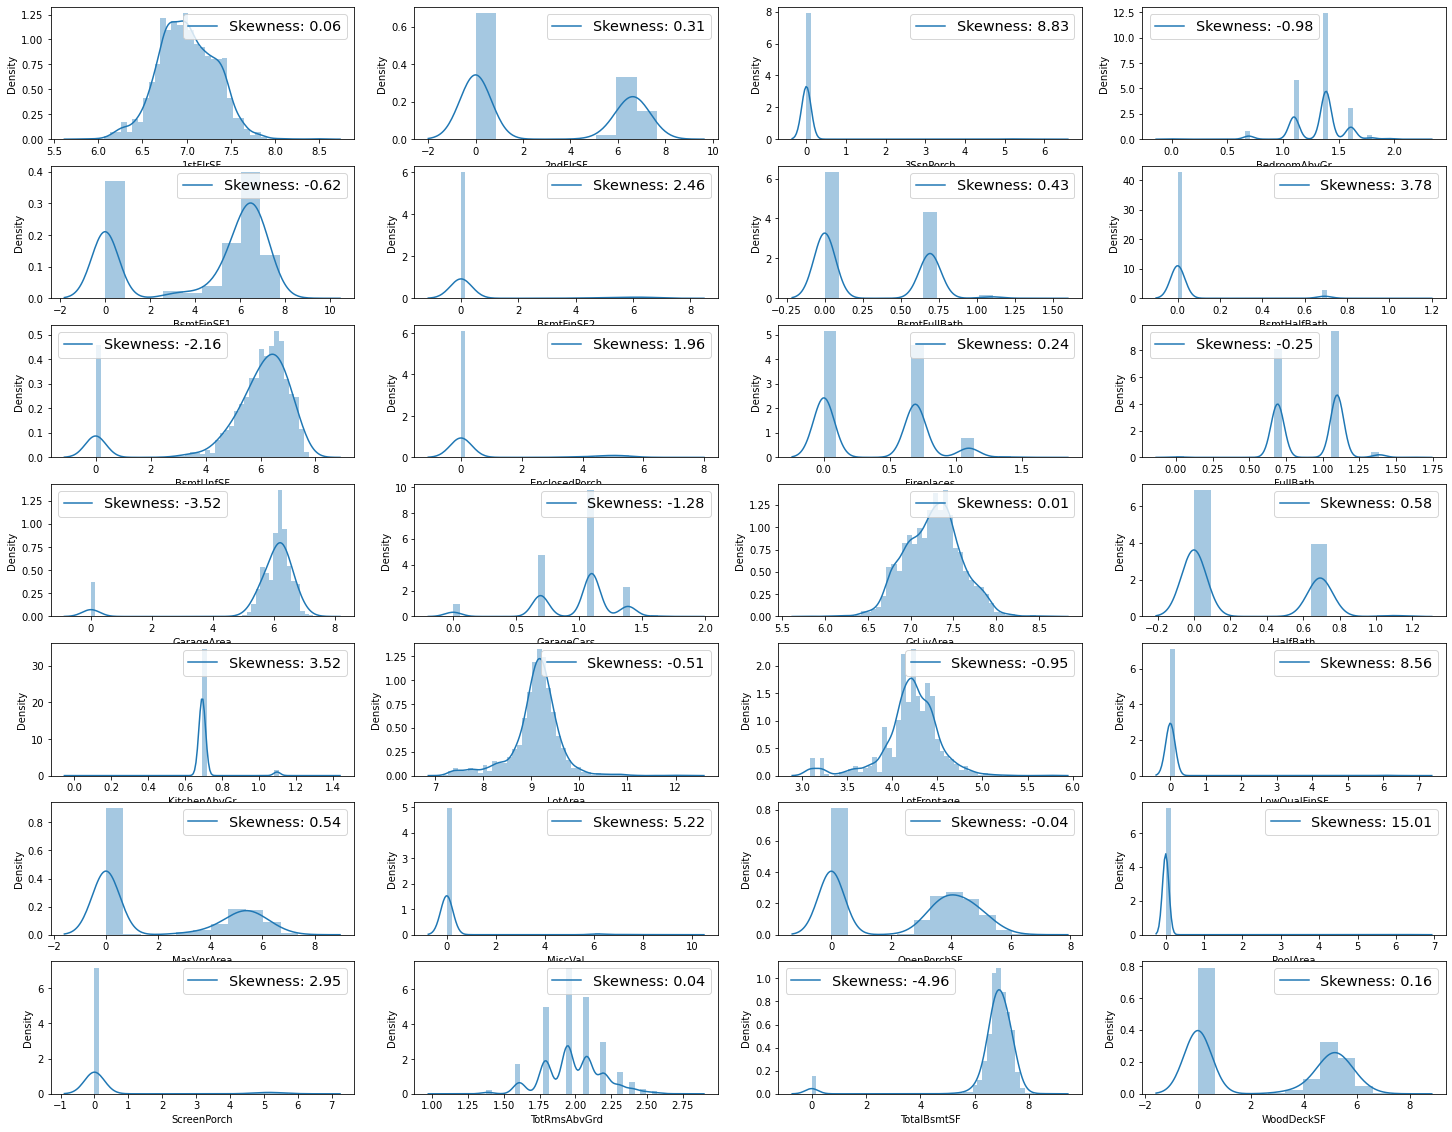

In [63]:
plt.figure(figsize=(25,20))
for i in range(len(skew_features)):
    if i <= 28:
        plt.subplot(7,4,i+1)
        ax = sns.distplot(df[skew_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df[skew_features[i]].skew())], fontsize = 'x-large')

# CO3 - Feature Selection

<AxesSubplot:>

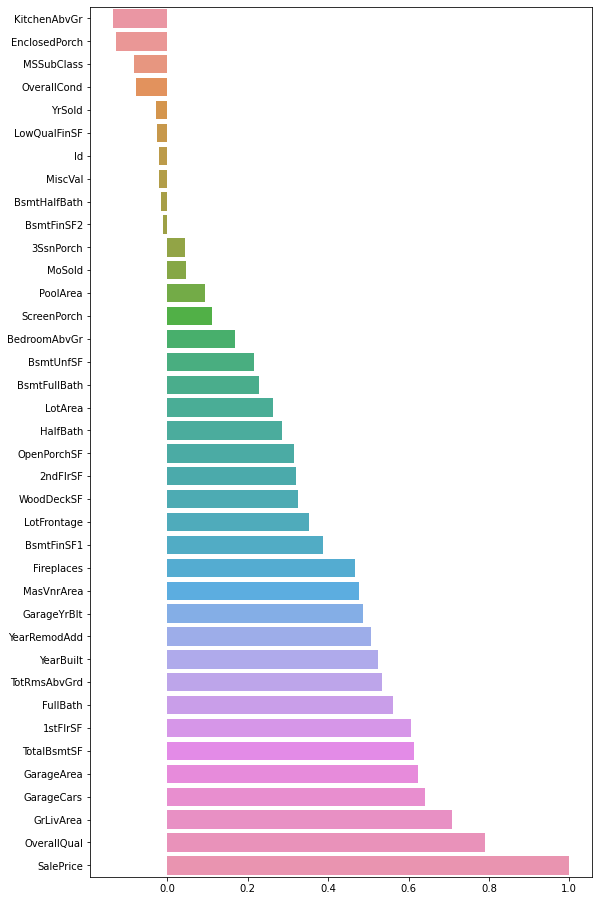

In [64]:
# correlation Barplot
plt.figure(figsize=(9,16))
corr_feat_series = pd.Series.sort_values(train.corrwith(train.SalePrice))
sns.barplot(x=corr_feat_series, y=corr_feat_series.index, orient='h')

In [65]:
df =  pd.read_csv('data/df_for_feature_eng.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
y_test = pd.read_csv('data/sample_submission.csv')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,4.189655,9.042040,Pave,Reg,Lvl,0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,0,0,PConc,0,3,-1,0,6.561031,0,0.0,5.017280,6.753438,GasA,0,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,0,2.197225,0,0.000000,Attchd,2003.0,0,1.098612,6.308098,0,0,0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,Feb,2008,WD,Normal
1,20,RL,4.394449,9.169623,Pave,Reg,Lvl,0,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,1,0,CBlock,0,3,3,1,6.886532,0,0.0,5.652489,7.141245,GasA,0,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1,1.945910,0,0.693147,Attchd,1976.0,0,1.098612,6.133398,0,0,0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,May,2007,WD,Normal
2,60,RL,4.234107,9.328212,Pave,IR1,Lvl,0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,0,0,PConc,0,3,1,0,6.188264,0,0.0,6.075346,6.825460,GasA,0,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,0,1.945910,0,0.693147,Attchd,2001.0,0,1.098612,6.411818,0,0,0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,Sep,2008,WD,Normal
3,70,RL,4.110874,9.164401,Pave,IR1,Lvl,0,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,1,0,BrkTil,1,4,-1,1,5.379897,0,0.0,6.293419,6.629363,GasA,1,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,0,2.079442,0,0.693147,Detchd,1998.0,1,1.386294,6.466145,0,0,0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,Feb,2006,WD,Abnorml
4,60,RL,4.442651,9.565284,Pave,IR1,Lvl,0,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,0,0,PConc,0,3,2,0,6.486161,0,0.0,6.196444,7.044033,GasA,0,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,0,2.302585,0,0.693147,Attchd,2000.0,0,1.386294,6.729824,0,0,0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,Dec,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,3.091042,7.568896,Pave,Reg,Lvl,0,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,1,0,CBlock,1,3,-1,2,0.000000,0,0.0,6.304449,6.304449,GasA,1,Y,SBrkr,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,0.693147,0.693147,1.386294,0.693147,1,1.791759,0,0.000000,NaN,0.0,3,0.000000,0.000000,3,2,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,Jun,2006,WD,Normal
2915,160,RM,3.091042,7.546974,Pave,Reg,Lvl,0,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,1,0,CBlock,1,3,-1,3,5.533389,0,0.0,5.686975,6.304449,GasA,2,Y,SBrkr,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,0.693147,0.693147,1.386294,0.693147,1,1.945910,0,0.000000,CarPort,1970.0,1,0.693147,5.659482,0,0,0,0.000000

In [66]:
df = df.drop(['YrSold','LowQualFinSF','MiscVal','BsmtHalfBath','BsmtFinSF2','3SsnPorch','MoSold'],axis=1)

In [67]:
quan = list(df.loc[:,df.dtypes != 'object'].columns.values)
quan

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'Utilities',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea']

In [68]:
skewd_feat = ['1stFlrSF','2ndFlrSF','BedroomAbvGr','BsmtFinSF1','BsmtFullBath','BsmtUnfSF','EnclosedPorch','Fireplaces',
              'FullBath','GarageArea','GarageCars','GrLivArea','HalfBath','KitchenAbvGr','LotArea','LotFrontage',
              'MasVnrArea','OpenPorchSF','PoolArea','ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF']

In [69]:
# Decrease the skewness of the data
for i in skewd_feat:
    df[i] = np.log(df[i] + 1)
    
SalePrice = np.log(train['SalePrice'] + 1)

In [70]:
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
print(len(obj_feat))
obj_feat

23


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [71]:
# dummy variable
dummy_drop = []
for i in obj_feat:
    dummy_drop += [i + '_' + str(df[i].unique()[-1])]

df = pd.get_dummies(df, columns = obj_feat)
df = df.drop(dummy_drop, axis = 1)

In [72]:
df.shape

(2919, 188)

### Scaling

In [73]:
# scaling dataset with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

In [74]:
train_len = len(train)

X_train = df[:train_len]
X_test = df[train_len:]
y_train = SalePrice
final_scores = []

y_test_df = pd.read_csv('data/sample_submission.csv')
y_test = y_test_df.SalePrice

# CO1 - Base Learners

### Cross Validation

In [75]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = r2_val_score.mean()
    return score

### Linear Models

In [76]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
LR_score = test_model(LR)
final_scores.append(['Linear Regression', LR_score])
print(LR_score)

0.8520067858183346


In [77]:
rdg = linear_model.Ridge()
RG_score = test_model(rdg)
final_scores.append(['Ridge Regression', RG_score])
print(RG_score)

0.8852312653921276


In [78]:
lasso = linear_model.Lasso(alpha=1e-4)
LS_score = test_model(lasso)
final_scores.append(['Lasso Regression', LS_score])
print(LS_score)

0.8815466438945959


In [79]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
test_model(svr)

0.8788598912872466

### CO - 3 Hyperparameter Tuning

In [80]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'kernel': ['rbf'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000],
         'epsilon': [1, 0.2, 0.1, 0.01, 0.001, 0.0001]}
rand_search = RandomizedSearchCV(svr, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(X_train, y_train)
rand_search.best_estimator_

SVR(C=100, gamma=0.0001)

In [81]:
svr_reg1=SVR(C=100, epsilon=0.0001, gamma=0.0001)
SVM_score = test_model(svr_reg1)
final_scores.append(['SVM', SVM_score])
print(SVM_score)

0.8983190915407352


### Decision Tree Regressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=1)
DT_score = test_model(dt_reg)
final_scores.append(['Decision Tree', DT_score])
print(DT_score)

0.6941627705581322


# CO2 - Ensemble Learning

### Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 100, random_state=51)
RF_score = test_model(rf_reg)
final_scores.append(['Random Forest', RF_score])
print(RF_score)

0.8567788162096669


### Bagging

In [84]:
estimator = [('Lasso',lasso), ('Ridge',rdg), ('SVM',svr_reg1), ('Random Forest',rf_reg)]

In [85]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor

In [86]:
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
BG_score = test_model(br_reg)
final_scores.append(['Bagging', BG_score])
print(BG_score)

0.8581807954963558


### Boosting

In [87]:
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)
GB_score = test_model(gbr_reg)
final_scores.append(['Gradient Boosting', GB_score])
print(GB_score)

0.8897133973255219


### XGBoost

In [88]:
import xgboost
#xgb_reg=xgboost.XGBRegressor()
xgb_reg = xgboost.XGBRegressor(random_state=1)
test_model(xgb_reg)

0.8648253295065643

In [89]:
xgb2_reg=xgboost.XGBRegressor(n_estimators= 900,max_depth= 4,learning_rate= 0.05)
XGB_score = test_model(xgb2_reg)
final_scores.append(['XGBoost', XGB_score])
print(XGB_score)

0.888898197375113


### Stacking

In [90]:
str_reg = StackingRegressor(estimators=estimator, final_estimator= svr_reg1, cv= 5, n_jobs= -1)
ST_score = test_model(str_reg)
final_scores.append(['Stacking', ST_score])
print(ST_score)

0.8992849032678482


# CO4 - Building ANN Models

### ANN

In [97]:
from keras.models import Sequential
from keras.layers import BatchNormalization 
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=300, activation='linear'))
model.add(BatchNormalization())
model.add(Dense(units=200, activation='linear'))
model.add(BatchNormalization())
model.add(Dense(units=100, activation='linear'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_logarithmic_error', optimizer='adam') 

model.fit(X_train, y_train, validation_split=0.2, epochs=90, batch_size=54)

Epoch 1/90
22/22 [==============================] - 0s 10ms/step - loss: 3.0904 - val_loss: 3.2991
Epoch 2/90
22/22 [==============================] - 0s 4ms/step - loss: 1.6602 - val_loss: 1.6561
Epoch 3/90
22/22 [==============================] - 0s 4ms/step - loss: 1.2892 - val_loss: 1.1977
Epoch 4/90
22/22 [==============================] - 0s 4ms/step - loss: 1.1719 - val_loss: 1.0713
Epoch 5/90
22/22 [==============================] - 0s 4ms/step - loss: 1.1065 - val_loss: 0.9104
Epoch 6/90
22/22 [==============================] - 0s 4ms/step - loss: 1.0394 - val_loss: 0.8924
Epoch 7/90
22/22 [==============================] - 0s 4ms/step - loss: 0.9631 - val_loss: 0.8422
Epoch 8/90
22/22 [==============================] - 0s 5ms/step - loss: 1.0511 - val_loss: 0.8591
Epoch 9/90
22/22 [==============================] - 0s 4ms/step - loss: 0.9300 - val_loss: 0.8142
Epoch 10/90
22/22 [==============================] - 0s 4ms/step - loss: 0.9908 - val_loss: 0.8758
Epoch 11/90
22/22 

Epoch 84/90
22/22 [==============================] - 0s 5ms/step - loss: 0.5119 - val_loss: 0.4386
Epoch 85/90
22/22 [==============================] - 0s 4ms/step - loss: 0.5071 - val_loss: 0.4385
Epoch 86/90
22/22 [==============================] - 0s 4ms/step - loss: 0.5037 - val_loss: 0.4383
Epoch 87/90
22/22 [==============================] - 0s 4ms/step - loss: 0.5352 - val_loss: 0.4381
Epoch 88/90
22/22 [==============================] - 0s 5ms/step - loss: 0.5061 - val_loss: 0.4381
Epoch 89/90
22/22 [==============================] - 0s 4ms/step - loss: 0.5351 - val_loss: 0.4378
Epoch 90/90
22/22 [==============================] - 0s 4ms/step - loss: 0.5031 - val_loss: 0.4378


In [92]:
ANN_score = model.evaluate(X_test, y_test, verbose=0) / 100
final_scores.append(['ANN', ANN_score])
print(ANN_score)

0.9461995697021485


# CO5 - Comparison of Performance

In [93]:
final_scores

[['Linear Regression', 0.8520067858183346],
 ['Ridge Regression', 0.8852312653921276],
 ['Lasso Regression', 0.8815466438945959],
 ['SVM', 0.8983190915407352],
 ['Decision Tree', 0.6941627705581322],
 ['Random Forest', 0.8567788162096669],
 ['Bagging', 0.8581807954963558],
 ['Gradient Boosting', 0.8897133973255219],
 ['XGBoost', 0.888898197375113],
 ['Stacking', 0.8992849032678482],
 ['ANN', 0.9461995697021485]]

In [94]:
final_df = pd.DataFrame(final_scores, columns=['Model','Score'])
final_df_sorted = final_df.sort_values(by=['Score'], ascending=True, ignore_index=True)
print(final_df_sorted)

                Model     Score
0       Decision Tree  0.694163
1   Linear Regression  0.852007
2       Random Forest  0.856779
3             Bagging  0.858181
4    Lasso Regression  0.881547
5    Ridge Regression  0.885231
6             XGBoost  0.888898
7   Gradient Boosting  0.889713
8                 SVM  0.898319
9            Stacking  0.899285
10                ANN  0.946200


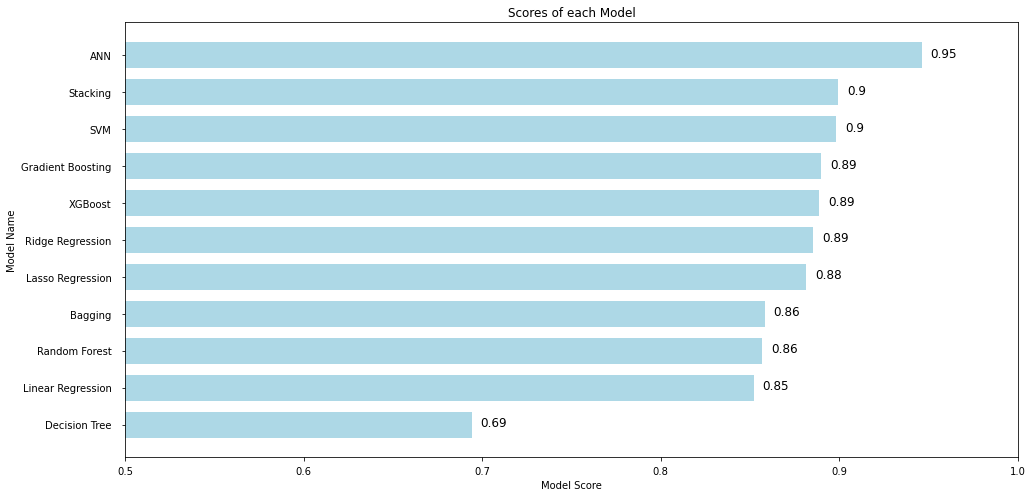

In [95]:
fig, ax = plt.subplots(figsize=(16,8))
ax.barh(final_df_sorted.Model, final_df_sorted.Score, color = 'lightblue', height = 0.7)

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

for i in ax.patches:
    plt.text(i.get_width()+0.005, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 12, color ='Black')

plt.xlim([0.5,1.0])
plt.xlabel('Model Score')
plt.ylabel('Model Name')
plt.title('Scores of each Model')
plt.show()

### Conclusion:
After trying different base learners, ensemble models and ANN, we see from the above plot that ANN gives the best accuracy of 94%. In ensemble models, Stacking gives best accuracy of 89% and in base learners SVM gives 89% accuracy.